In [188]:
import pandas as pd
import numpy as np
import sklearn as skl
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegressionCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

EDA

In [189]:
#get data

data = pd.read_csv('/home/dataengineer/OTUS_ML/data/IMDB Dataset.csv')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


PREPROCESSING AND FEATURE ENGINEERING

In [190]:
#one-hot coding

data = pd.get_dummies(data, columns=['sentiment'], drop_first=True)
data

,review,sentiment_positive
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [191]:
#replace useless symbols

data['review'] = data.review.str.replace("<br />", "")

In [192]:
#tf-idf transformation

tfid_vectorizer = TfidfVectorizer(stop_words='english', norm=None, min_df=0.005, max_df=0.995)
data_tfid = pd.DataFrame(tfid_vectorizer.fit_transform(data.review).todense(), columns=tfid_vectorizer.get_feature_names()) 

In [193]:
data_tfid

,000,10,100,11,12,13,14,15,16,17,...,year,years,yes,york,young,younger,youth,zero,zombie,zombies
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.952935,0.0,0.000000,3.246414,0.0,0.0,0.0,0.00000,0.0
3,0.0,3.009189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,10.99806,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,4.809486,0.000000,0.0,0.0,0.0,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,3.009189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0
49996,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0
49997,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0
49998,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0


In [194]:
#split data to train and test

X_train, X_test, y_train, y_test = train_test_split(data_tfid, data['sentiment_positive'], test_size=0.3, random_state=42)

MODELLING

In [195]:
#function for quality metrics

def quality(prediction_y, true_y):
    accuracy = accuracy_score(prediction_y, true_y)
    precision = precision_score(prediction_y, true_y)
    recall = recall_score(prediction_y, true_y)
    f1 = f1_score(prediction_y, true_y)
    print("Accuracy:  {:.3f}\nPrecision: {:.3f}\nRecall:    {:.3f}\nF1-score:  {:.3f}".format(
        accuracy, precision, recall, f1
    ))

In [196]:
#build model

model = LogisticRegressionCV(cv=5, random_state=0)
model.fit(X_train, y_train)

LogisticRegressionCV(cv=5, random_state=0)

In [197]:
#get quality metrics

predictions = model.predict(X_test)

quality(predictions, y_test)

Accuracy:  0.884
Precision: 0.897
Recall:    0.877
F1-score:  0.887


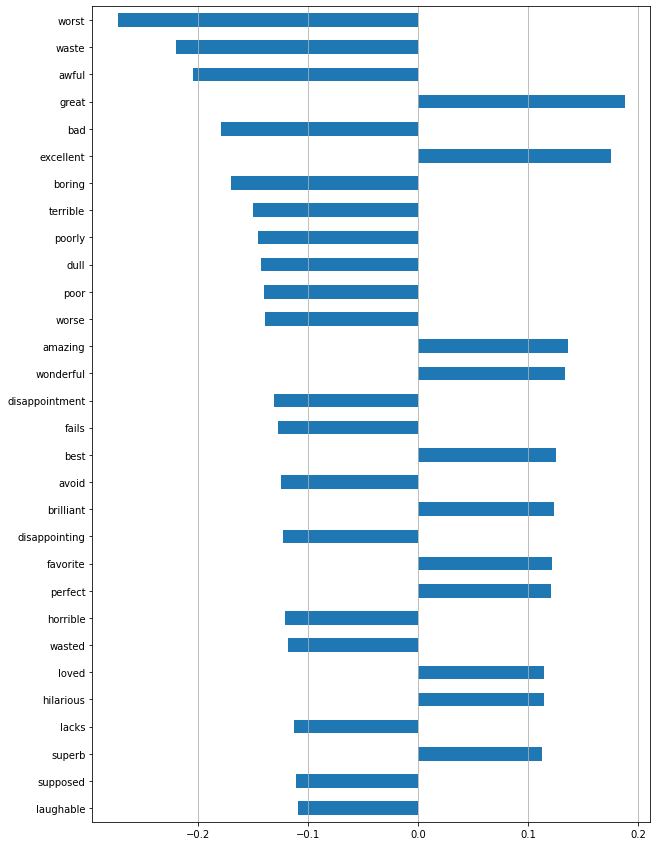

In [198]:
#coefficients visualisation

coefs = pd.DataFrame(model.coef_[0], X_train.columns)
coefs.columns = ["coef"]
coefs["abs"] = coefs.coef.apply(np.abs)
coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1).head(30)
    
plt.figure(figsize=(10, 15))
coefs.coef.plot(kind='barh')
plt.grid(True, axis='x')
plt.gca().invert_yaxis()